## Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

https://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Stock%20Market%20Analysis.ipynb

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,206.956604
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,206.689255
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,203.679108
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,207.134857
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,211.184647


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,306.582372,299.272767,302.551027,303.396244,3.692393e+07,302.004088
std,67.870091,66.187923,67.110497,67.218171,1.767705e+07,67.759729
min,206.979996,204.220001,206.429993,205.699997,1.165440e+07,203.679108
25%,259.529999,252.949997,256.769989,257.500000,2.520140e+07,254.970215
50%,293.970001,285.850006,289.170013,289.910004,3.204650e+07,288.019653
75%,326.200012,321.470001,324.190002,324.950012,4.252710e+07,323.409851
max,515.140015,500.329987,514.789978,506.089996,1.066275e+08,506.089996


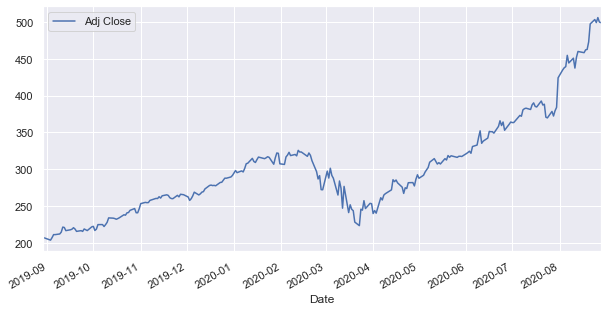

In [7]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

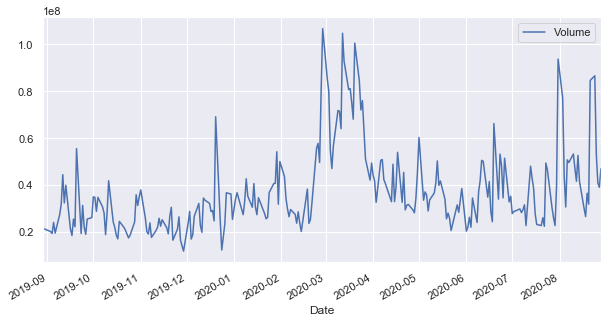

In [8]:
AAPL['Volume'].plot(legend=True,figsize=(10,5))

In [9]:
ma_day = [10,20,50]

for ma in ma_day: 
    column_name = "MA for %s days"%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
    

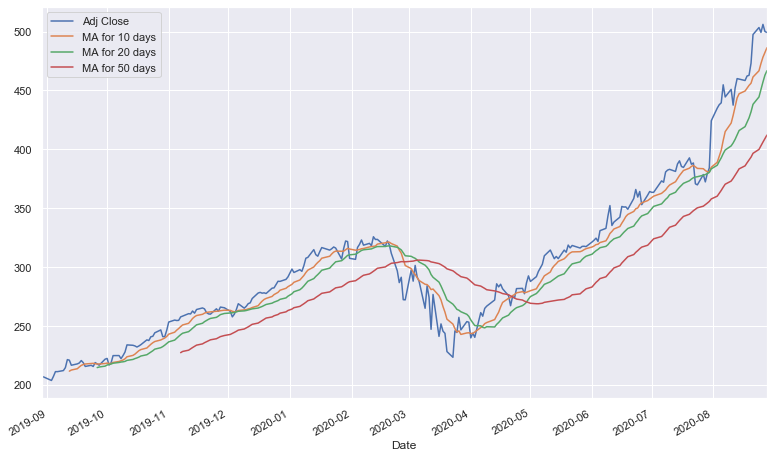

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(13,8))

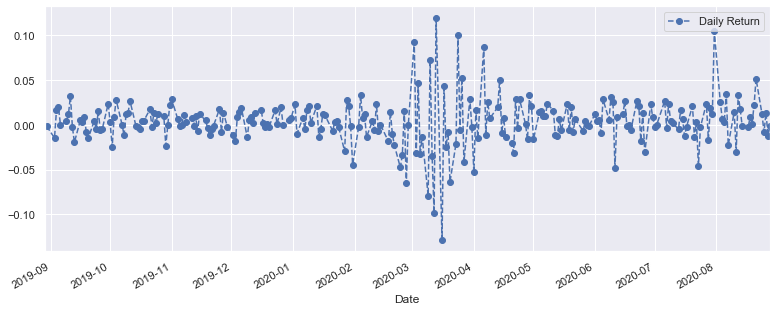

In [11]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(13,5),legend=True,linestyle='--',marker='o')

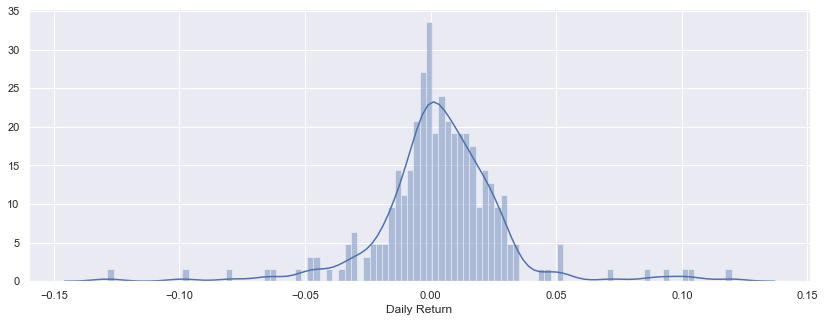

In [12]:
plt.figure(figsize=(14,5))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

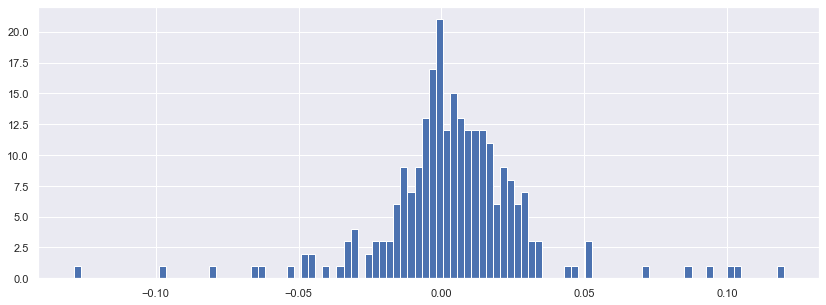

In [71]:
plt.figure(figsize=(14,5))
AAPL['Daily Return'].hist(bins=100)

In [14]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [15]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-29,206.956604,1192.849976,136.565262,1786.400024
2019-08-30,206.689255,1188.099976,136.308212,1776.290039
2019-09-03,203.679108,1168.390015,134.508682,1789.839966
2019-09-04,207.134857,1181.410034,136.080795,1800.619995
2019-09-05,211.184647,1211.380005,138.473541,1840.719971
...,...,...,...,...
2020-08-24,503.429993,1588.199951,213.690002,3307.459961
2020-08-25,499.299988,1608.219971,216.470001,3346.489990
2020-08-26,506.089996,1652.380005,221.149994,3441.850098


In [16]:
tech_rets = closing_df.pct_change()

tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-29,NaN,NaN,NaN,NaN
2019-08-30,-0.001292,-0.003982,-0.001882,-0.005659
2019-09-03,-0.014564,-0.016589,-0.013202,0.007628
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270


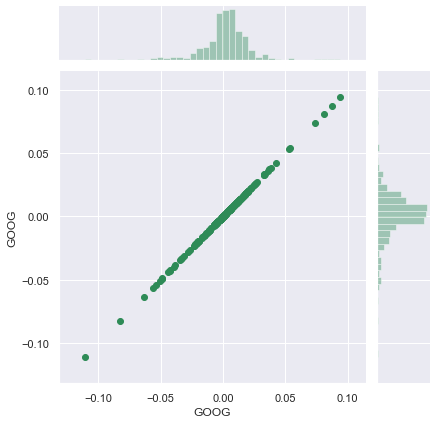

In [17]:
sns.jointplot("GOOG", "GOOG", data=tech_rets,
                  kind="scatter",
                  color="seagreen")

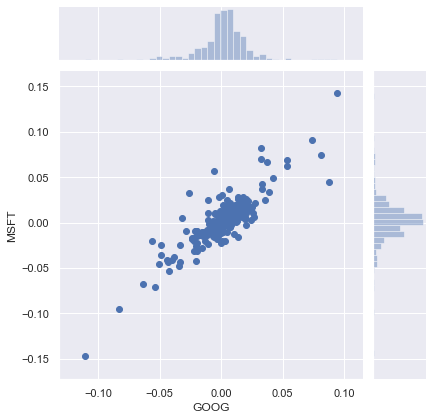

In [18]:
sns.set(style="darkgrid")
sns.jointplot("GOOG", "MSFT", data=tech_rets,
                  kind="scatter")

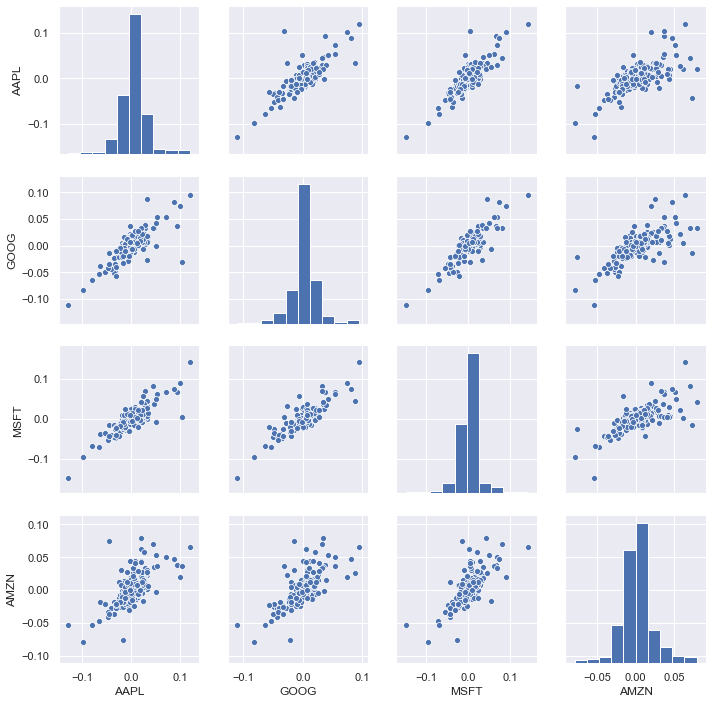

In [19]:
sns.pairplot(tech_rets.dropna())

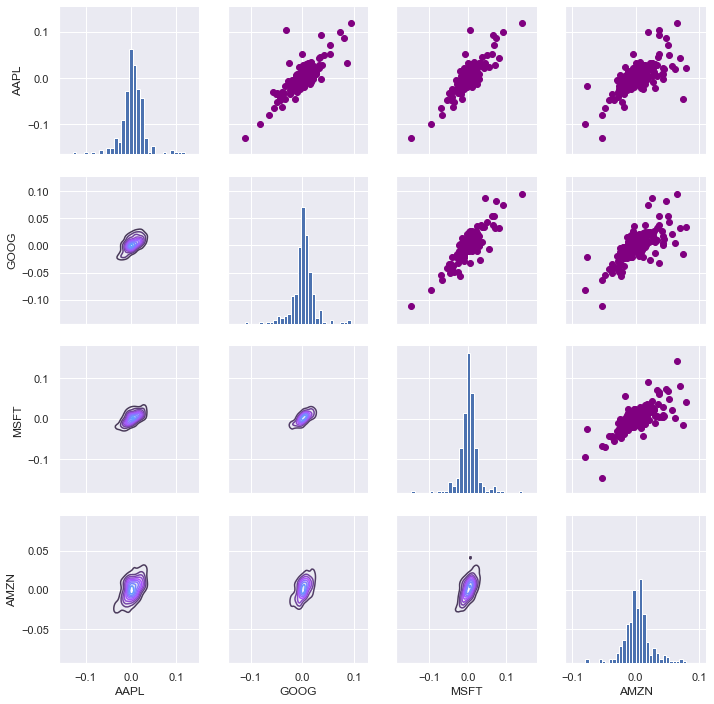

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

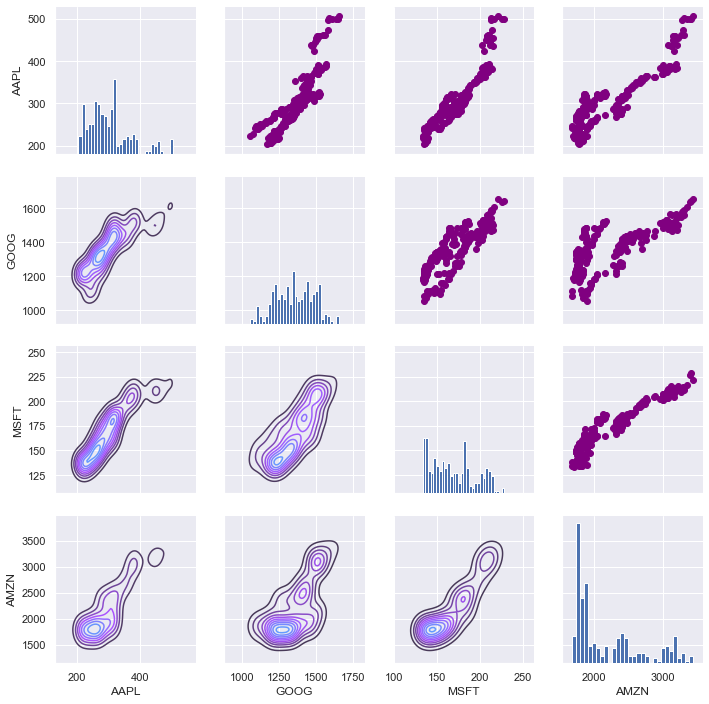

In [22]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [62]:

corr = tech_rets.dropna().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1,0.79,0.84,0.64
GOOG,0.79,1,0.86,0.69
MSFT,0.84,0.86,1,0.71
AMZN,0.64,0.69,0.71,1


#### Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [45]:
rets = tech_rets.dropna()

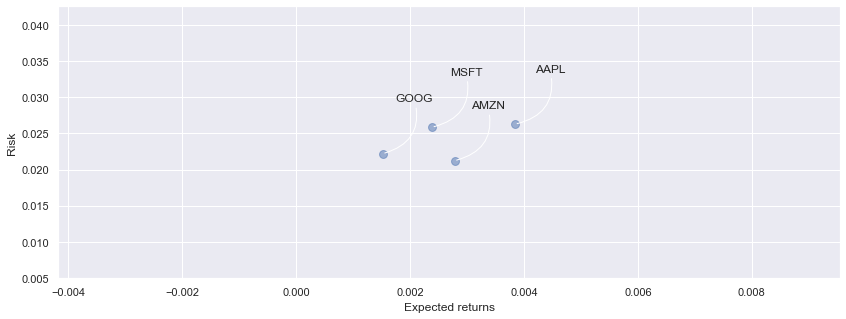

In [60]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20
plt.figure(figsize=(14,5))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

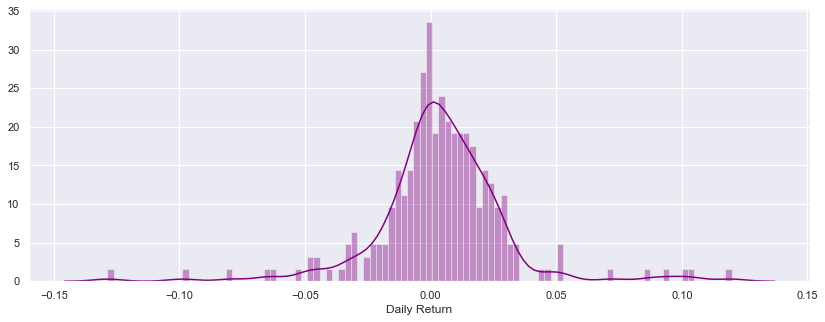

In [68]:
plt.figure(figsize=(14,5))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [73]:
# The 0.05 quantile of daily returns. 
#With 95% confidence or 95% of the simulations that we will do this, the daily loss will not exceed that number

rets['AAPL'].quantile(0.05)


-0.033082823347084525

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed -3.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.033 * 1,000,000 = $.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt‾‾‾√

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt‾‾‾√)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [75]:
days = 365

dt = 1 / days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


In [91]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price
    


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

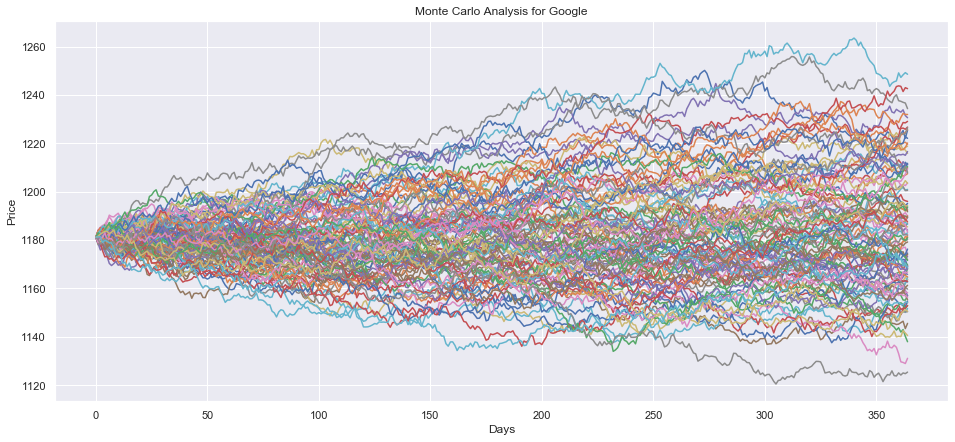

In [95]:
start_price = GOOG['Open'][0]
plt.figure(figsize=(16,7))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [99]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [100]:
simulations

array([1205.52744485, 1184.7608628 , 1211.39178427, ..., 1217.43162277,
       1228.01060496, 1193.12502726])

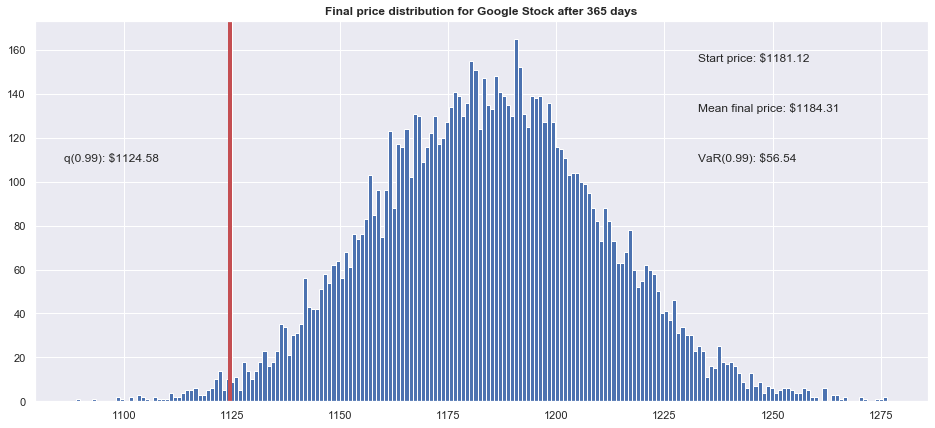

In [104]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
plt.figure(figsize=(16,7)) 
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.7, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.7, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.7, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');